# Brain tumor detection

In [1]:
import numpy as np
import tensorflow as tf
import os
import PIL
import PIL.Image
import pathlib

### Load data

In [2]:
tumor_dataset_path = os.getcwd() + "\\dataset" + "\\brain_tumor"
healthy_dataset_path = os.getcwd() + "\\dataset" + "\\healthy"
dataset_path = os.getcwd() + "\\dataset"

tumor_data_dir = pathlib.Path(tumor_dataset_path)
healthy_data_dir = pathlib.Path(healthy_dataset_path)
data_dir = pathlib.Path(dataset_path)

In [3]:
image_count_tumor = len(list(tumor_data_dir.glob('*.jpg')))
image_count_healthy = len(list(healthy_data_dir.glob('*.jpg')))
print(image_count_tumor, image_count_healthy)

2426 2080


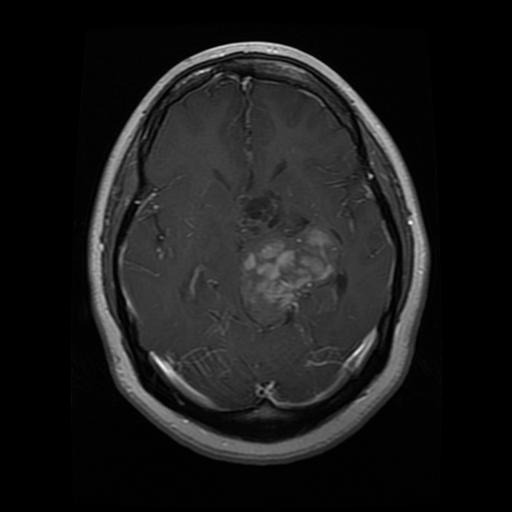

In [4]:
tumors = list(tumor_data_dir.glob('*'))
PIL.Image.open(str(tumors[0]))

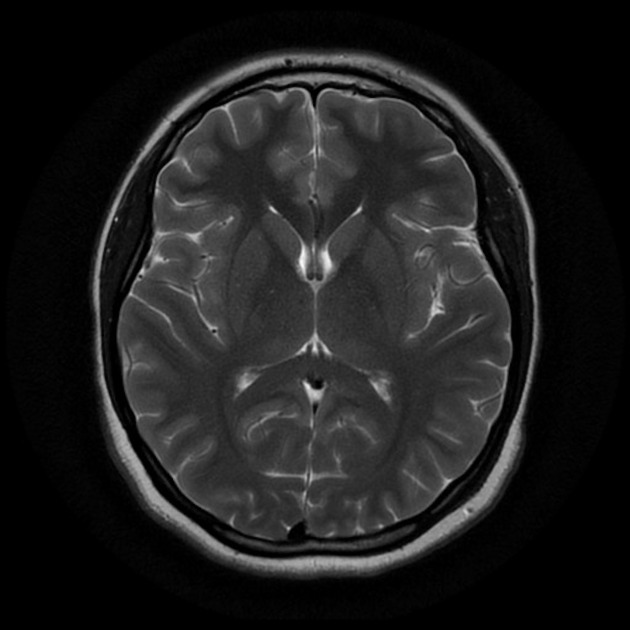

In [8]:
healthy = list(healthy_data_dir.glob('*'))
PIL.Image.open(str(healthy[0]))

### Split dataset between train and test

In [9]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    seed=123,
    subset='training', 
    image_size=(180, 180),
    batch_size=32)

Found 4514 files belonging to 2 classes.
Using 3612 files for training.


In [10]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    seed=123,
    subset='validation', 
    image_size=(180, 180),
    batch_size=32)

Found 4514 files belonging to 2 classes.
Using 902 files for validation.


In [11]:
class_names = train_ds.class_names
print(class_names)

['brain_tumor', 'healthy']


#### Visualize the data

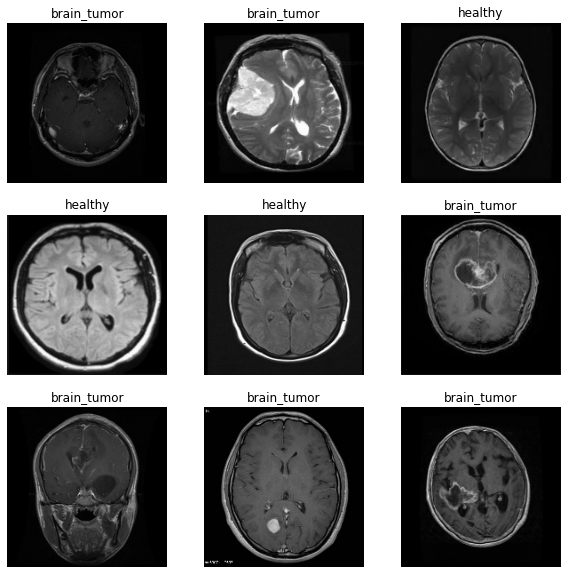

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

#### Standardize data

In [14]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.8363693


#### Configure the dataset for performance

In [15]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Train models

In [16]:
num_classes = 2 

#### model1

In [17]:
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy']
)

In [19]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
113/113 [==============================] - 99s 873ms/step - loss: 0.1386 - accuracy: 0.9468 - val_loss: 0.1262 - val_accuracy: 0.9557
Epoch 2/10
113/113 [==============================] - 99s 874ms/step - loss: 0.0782 - accuracy: 0.9718 - val_loss: 0.0958 - val_accuracy: 0.9667
Epoch 3/10
113/113 [==============================] - 99s 872ms/step - loss: 0.0476 - accuracy: 0.9856 - val_loss: 0.0939 - val_accuracy: 0.9667
Epoch 4/10
113/113 [==============================] - 100s 886ms/step - loss: 0.0379 - accuracy: 0.9875 - val_loss: 0.0878 - val_accuracy: 0.9623
Epoch 5/10
113/113 [==============================] - 98s 870ms/step - loss: 0.0217 - accuracy: 0.9936 - val_loss: 0.1336 - val_accuracy: 0.9590
Epoch 6/10
113/113 [==============================] - 102s 904ms/step - loss: 0.0285 - accuracy: 0.9922 - val_loss: 0.0815 - val_accuracy: 0.9712
Epoch 7/10
113/113 [==============================] - 100s 885ms/step - loss: 0.0137 - accuracy: 0.9961 - val_loss: 0.0804 - val

#### model2

In [20]:
model2 = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

model2.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy']
)

In [21]:
model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
113/113 [==============================] - 84s 734ms/step - loss: 0.5360 - accuracy: 0.7309 - val_loss: 0.3731 - val_accuracy: 0.8392
Epoch 2/10
113/113 [==============================] - 88s 782ms/step - loss: 0.2877 - accuracy: 0.8859 - val_loss: 0.2241 - val_accuracy: 0.9091
Epoch 3/10
113/113 [==============================] - 135s 1s/step - loss: 0.1671 - accuracy: 0.9385 - val_loss: 0.1129 - val_accuracy: 0.9678
Epoch 4/10
113/113 [==============================] - 150s 1s/step - loss: 0.1117 - accuracy: 0.9596 - val_loss: 0.1098 - val_accuracy: 0.9601
Epoch 5/10
113/113 [==============================] - 132s 1s/step - loss: 0.0793 - accuracy: 0.9754 - val_loss: 0.0728 - val_accuracy: 0.9734
Epoch 6/10
113/113 [==============================] - 127s 1s/step - loss: 0.0452 - accuracy: 0.9856 - val_loss: 0.0756 - val_accuracy: 0.9712
Epoch 7/10
113/113 [==============================] - 139s 1s/step - loss: 0.0177 - accuracy: 0.9950 - val_loss: 0.0670 - val_accuracy: 0.

### Save the model

In [24]:
model.save(os.getcwd() + "\\model")

INFO:tensorflow:Assets written to: G:/Python Projects/TensorFlow/brain_tumor_classif/classif/model\assets
